<a href="https://colab.research.google.com/github/Abhi-SE/Federated-Learning-based-Handwritten-Digit-classification-using-FedAvg/blob/main/Federated_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:

mnist = tf.keras.datasets.mnist

(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:

train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

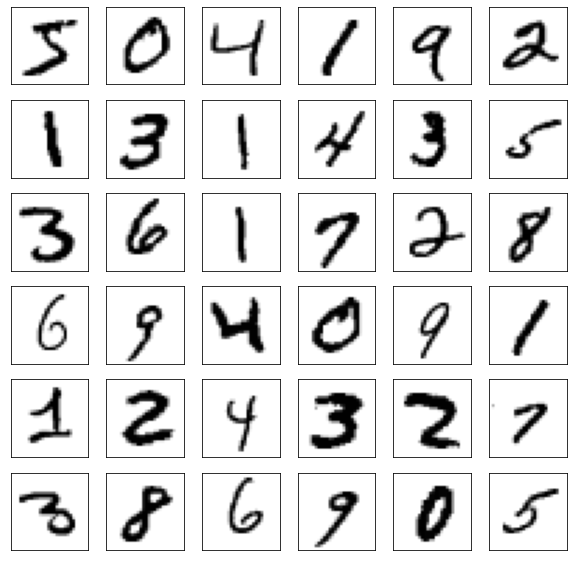

In [7]:


plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    
plt.show()

In [8]:
# Splitting of training images into 5 devices(12000 training each)
train1 = train_images[:12000]
train2 = train_images[12000:24000]
train3 = train_images[24000:36000]
train4 = train_images[36000:48000]
train5 = train_images[48000:60000]

In [13]:
len1 = len(train1)
len2 = len(train2)
len3 = len(train3)
len4 = len(train4)
len5 = len(train5)
len_test = len(test_images)

In [29]:
print(len2)
print(len3)
print(len_test)
print(len5)

12000
12000
10000
12000


In [30]:

y1 = train_labels[:12000]
y2 = train_labels[12000:24000]
y3 = train_labels[24000:36000]
y4 = train_labels[36000:48000]
y5 = train_labels[48000:60000]

<BarContainer object of 5 artists>

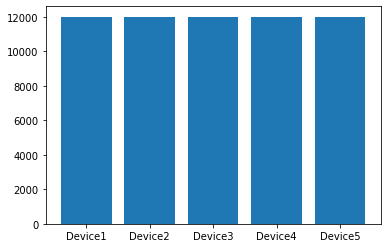

In [31]:

df = pd.Series(data=[len1, len2, len3, len4, len5], index=['Device1', 'Device2', 'Device3', 'Device4', 'Device5'], name="DATA").rename_axis("Data set length", axis=0)

x = df.index
y = df.values

plt.bar(x, y)

In [32]:
# normalizing the input
train1 = train1/255.0
train2 = train2/255.0
train3 = train3/255.0
train4 = train4/255.0
train5 = train5/255.0

In [33]:
# reshaping images in 3 dimensions
train1 = train1.reshape(-1,28,28,1)
train2 = train2.reshape(-1,28,28,1)
train3 = train3.reshape(-1,28,28,1)
train4 = train4.reshape(-1,28,28,1)
train5 = train5.reshape(-1,28,28,1)

In [34]:
def MAIN():
    model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
    ])
    model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    return model

In [35]:
#5 models for 5 Devices
model1 = MAIN()
model2 = MAIN()
model3 = MAIN()
model4 = MAIN()
model5 = MAIN()

Epoch 1/5
300/300 [==============================] - 1s 3ms/step - loss: 1.1375 - accuracy: 0.7352 - val_loss: 0.9613 - val_accuracy: 0.7946
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 0.8864 - accuracy: 0.8009 - val_loss: 0.7731 - val_accuracy: 0.8200
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 0.7342 - accuracy: 0.8343 - val_loss: 0.6549 - val_accuracy: 0.8417
Epoch 4/5
300/300 [==============================] - 1s 3ms/step - loss: 0.6348 - accuracy: 0.8540 - val_loss: 0.5755 - val_accuracy: 0.8550
Epoch 5/5
300/300 [==============================] - 1s 3ms/step - loss: 0.5648 - accuracy: 0.8673 - val_loss: 0.5194 - val_accuracy: 0.8692
Epoch 1/5
300/300 [==============================] - 1s 3ms/step - loss: 1.1165 - accuracy: 0.7572 - val_loss: 0.9464 - val_accuracy: 0.7921
Epoch 2/5
300/300 [==============================] - 1s 3ms/step - loss: 0.8743 - accuracy: 0.8021 - val_loss: 0.7662 - val_accuracy: 0.8171
Epoch 3/5
300

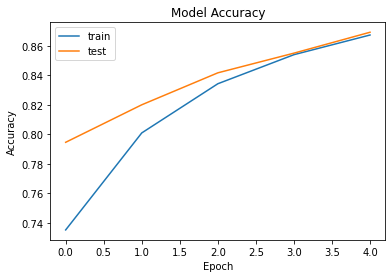

313/313 - 1s - loss: 11201.9141 - accuracy: 0.7705 - 554ms/epoch - 2ms/step


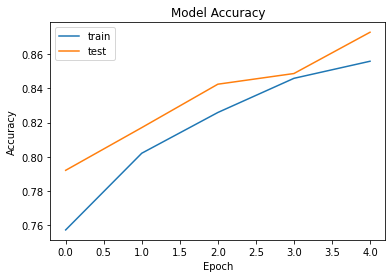

313/313 - 1s - loss: 10345.1348 - accuracy: 0.7818 - 562ms/epoch - 2ms/step


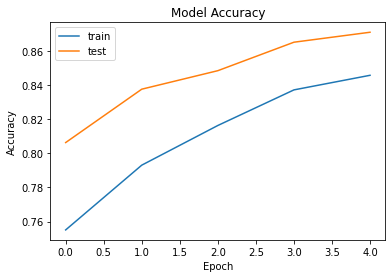

313/313 - 1s - loss: 10568.2354 - accuracy: 0.7946 - 563ms/epoch - 2ms/step


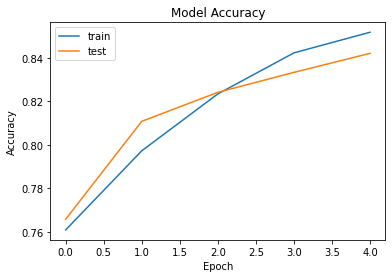

313/313 - 1s - loss: 10923.2842 - accuracy: 0.7853 - 561ms/epoch - 2ms/step


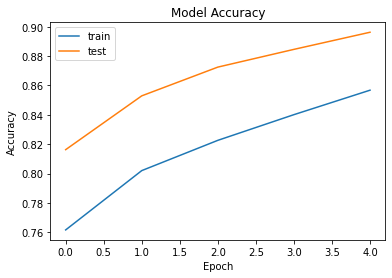

313/313 - 1s - loss: 10961.7812 - accuracy: 0.7790 - 579ms/epoch - 2ms/step


In [37]:
#training 5 models for 5 Devices
for i in range(1):
    h1 = model1.fit(train1, y1, validation_split=0.2, epochs=5, verbose=1)
    h2 = model2.fit(train2, y2, validation_split=0.2, epochs=5, verbose=1)
    h3 = model3.fit(train3, y3, validation_split=0.2, epochs=5, verbose=1)
    h4 = model4.fit(train4, y4, validation_split=0.2, epochs=5, verbose=1)
    h5 = model5.fit(train5, y5, validation_split=0.2, epochs=5, verbose=1)
    
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model1.evaluate(test_images,  test_labels, verbose=2)
    
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model2.evaluate(test_images,  test_labels, verbose=2)
    
    plt.plot(h3.history['accuracy'])
    plt.plot(h3.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model3.evaluate(test_images,  test_labels, verbose=2)

    plt.plot(h4.history['accuracy'])
    plt.plot(h4.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model4.evaluate(test_images,  test_labels, verbose=2)


    plt.plot(h5.history['accuracy'])
    plt.plot(h5.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    model5.evaluate(test_images,  test_labels, verbose=2)

In [38]:

model1 = MAIN()
model2 = MAIN()
model3 = MAIN()
model4 = MAIN()
model5 = MAIN()

for i in range(50):
  h1 = model1.fit(train1, y1,validation_split = 0.2, epochs=2, verbose=1)
  h2 = model2.fit(train2, y2,validation_split = 0.2, epochs=2, verbose=1)
  h3 = model3.fit(train3, y3,validation_split = 0.2, epochs=2, verbose=1)
  h4 = model4.fit(train4, y4,validation_split = 0.2, epochs=2, verbose=1)
  h5 = model5.fit(train5, y5, validation_split=0.2, epochs=5, verbose=1)

  w1 = model1.get_weights()
  w2 = model2.get_weights()
  w3 = model3.get_weights()
  w4 = model4.get_weights()
  w5 = model5.get_weights()

  a = np.array(w1)
  b = np.array(w2)
  c = np.array(w3)
  d = np.array(w4)
  e = np.array(w5)

  mean = (a+b+c+d+e)/5

  model1.set_weights(mean)
  model2.set_weights(mean)
  model3.set_weights(mean)
  model4.set_weights(mean)
  model5.set_weights(mean)

model1.evaluate(test_images, test_labels, verbose=2)
model2.evaluate(test_images, test_labels, verbose=2)
model3.evaluate(test_images, test_labels, verbose=2)
model4.evaluate(test_images, test_labels, verbose=2)
model5.evaluate(test_images, test_labels, verbose=2)

Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 2.1589 - accuracy: 0.3981 - val_loss: 1.8914 - val_accuracy: 0.4750
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 1.5790 - accuracy: 0.5907 - val_loss: 1.2856 - val_accuracy: 0.6879
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 2.1414 - accuracy: 0.4270 - val_loss: 1.8519 - val_accuracy: 0.5938
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 1.5385 - accuracy: 0.6450 - val_loss: 1.2442 - val_accuracy: 0.6925
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 2.1439 - accuracy: 0.4410 - val_loss: 1.8700 - val_accuracy: 0.6117
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 1.5465 - accuracy: 0.6649 - val_loss: 1.2697 - val_accuracy: 0.7333
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 2.1410 - accuracy: 0.4946 - val_loss: 1.8611 - val_accuracy: 0.5913
Epoch 2/2
300

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local

300/300 [==============================] - 1s 3ms/step - loss: 1.4676 - accuracy: 0.6847 - val_loss: 1.1117 - val_accuracy: 0.7696
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 0.9753 - accuracy: 0.7782 - val_loss: 0.8208 - val_accuracy: 0.8067
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 1.5203 - accuracy: 0.6814 - val_loss: 1.1740 - val_accuracy: 0.7496
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 1.0340 - accuracy: 0.7627 - val_loss: 0.8687 - val_accuracy: 0.8054
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 1.5061 - accuracy: 0.6845 - val_loss: 1.1680 - val_accuracy: 0.7900
Epoch 2/2
300/300 [==============================] - 1s 3ms/step - loss: 1.0174 - accuracy: 0.7789 - val_loss: 0.8659 - val_accuracy: 0.8254
Epoch 1/2
300/300 [==============================] - 1s 3ms/step - loss: 1.4965 - accuracy: 0.6930 - val_loss: 1.1701 - val_accuracy: 0.7454
Epoch 2/2
300/300 [====

[5928.20458984375, 0.9325000047683716]

In [39]:
predictions=model1.predict([test_images])
print(predictions)

[[  -40528.96   -760996.4      72687.25  ...   314637.62    -62648.758
   -165877.03 ]
 [   70974.73   -147172.69    415496.06  ... -1100786.2      23237.918
  -1249546.4  ]
 [ -330650.9     141352.2      43621.41  ...   -32087.451    27113.467
   -279999.84 ]
 ...
 [ -521342.2    -613586.7    -381035.56  ...  -118935.46    168210.33
     28761.637]
 [ -152596.81   -323669.44   -433605.75  ...  -437402.94    200703.94
   -462134.1  ]
 [   27173.826  -895093.94    -25761.584 ...  -583585.06   -204119.73
   -463743.3  ]]


In [40]:
print(np.argmax(predictions[0]))

7


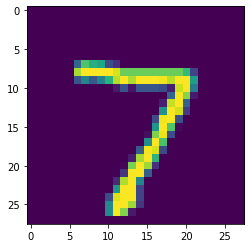

In [42]:
plt.imshow(test_images[0])

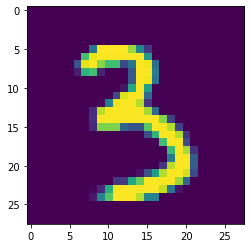

In [43]:
plt.imshow(test_images[32])

In [44]:
print(np.argmax(predictions[32]))

3
